<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [11]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user --quiet

^C


In [6]:
!pip install xgboost --quiet

^C


In [12]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [125]:
data = pd.read_csv("EasyVisa.csv")
df=data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [126]:
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [127]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [128]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [130]:
df.describe([0.2,0.25,0.5,0.75,0.9,1]).T

,count,mean,std,min,20%,25%,50%,75%,90%,100%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,815.000,1022.00,2109.00,3504.0000,5069.000,602069.00,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1966.000,1976.00,1997.00,2005.0000,2009.100,2016.00,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,25674.208,34015.48,70308.21,107735.5125,139689.798,319210.27,319210.27


#### Fixing the negative values in number of employees columns

In [131]:
df.loc[df['no_of_employees'] < 0].shape


(33, 12)

In [132]:
df['no_of_employees'] = df['no_of_employees'].abs()


#### Let's check the count of each unique category in each of the categorical variables

In [133]:
# Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Counting unique values for each categorical column
for col in categorical_cols:
    print(f"Unique value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)


Unique value counts for 'case_id':
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
----------------------------------------
Unique value counts for 'continent':
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
Unique value counts for 'education_of_employee':
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
Unique value counts for 'has_job_experience':
Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
Unique value counts for 'requires_job_training':
N    22525
Y     2955
Name: requires_job_training, dtype:

In [134]:
data["case_id"].nunique()


25480

### Univariate Analysis

In [135]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top, sorted in descending order.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # total number of observations
    count = data[feature].nunique()  # number of unique categories
    
    # Adjusting figure size dynamically
    width = max(12, min(count * 1.5, 20))  # Ensuring a reasonable width
    height = 8  # Increasing height for better visualization
    
    plt.figure(figsize=(width, height))  # Enlarged figure size
    plt.xticks(rotation=45, fontsize=14)  # Rotating labels for readability
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts(ascending=False).index[:n],  # Sorted in descending order
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # Show percentage
        else:
            label = p.get_height()  # Show count

        x = p.get_x() + p.get_width() / 2  # Bar center
        y = p.get_height()  # Bar height

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.xlabel(feature, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.title(f"Distribution of {feature}", fontsize=18, fontweight="bold")
    plt.show()


Visualizing numerical feature: no_of_employees
Visualizing numerical feature: yr_of_estab
Visualizing numerical feature: prevailing_wage


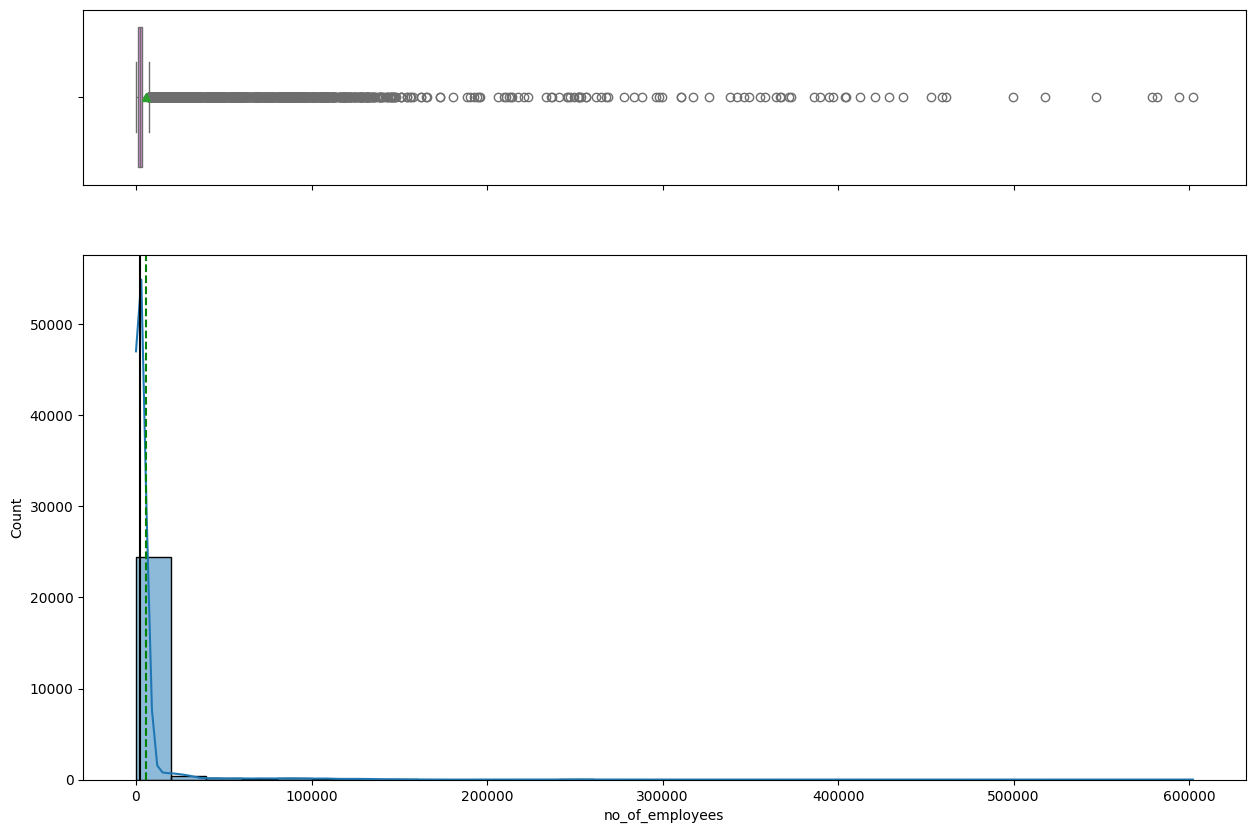

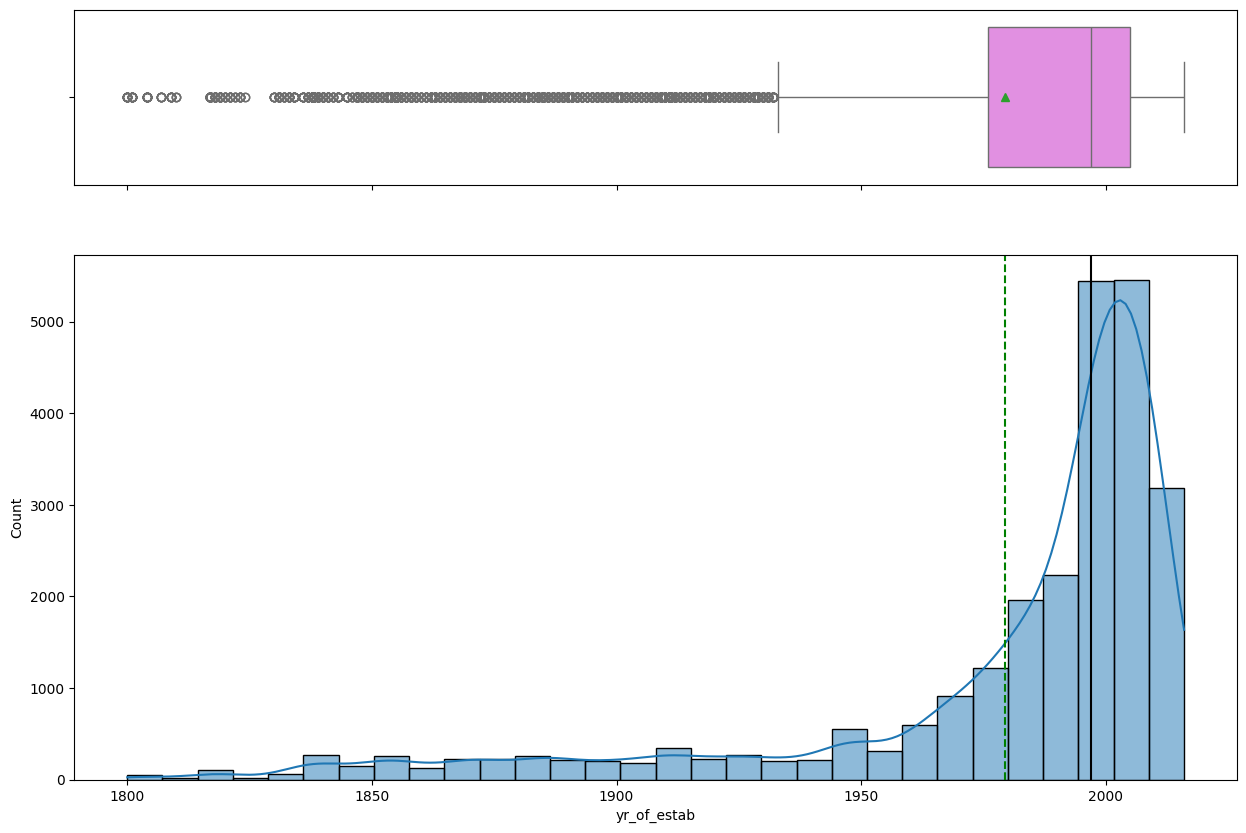

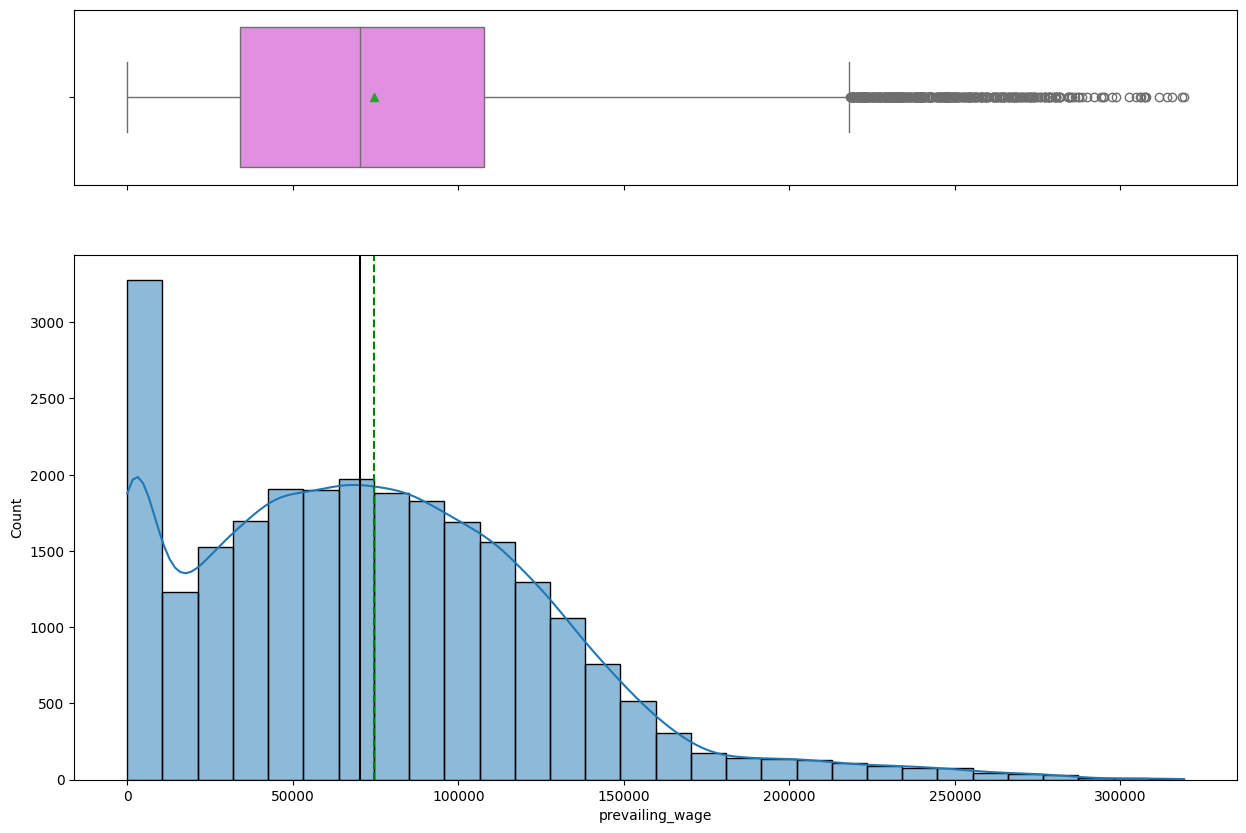

In [137]:
numerical_cols = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

for col in numerical_cols:
    print(f"Visualizing numerical feature: {col}")
    histogram_boxplot(df, feature=col, kde=True, bins=30)


Visualizing categorical feature: continent


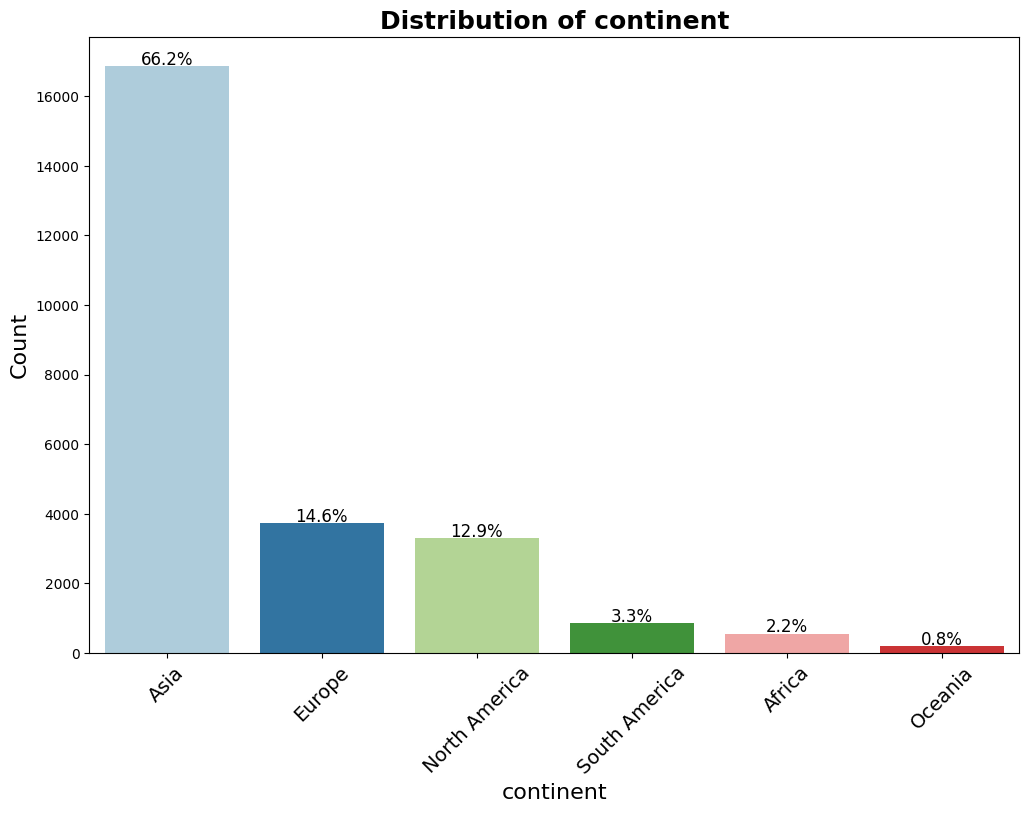

Visualizing categorical feature: education_of_employee


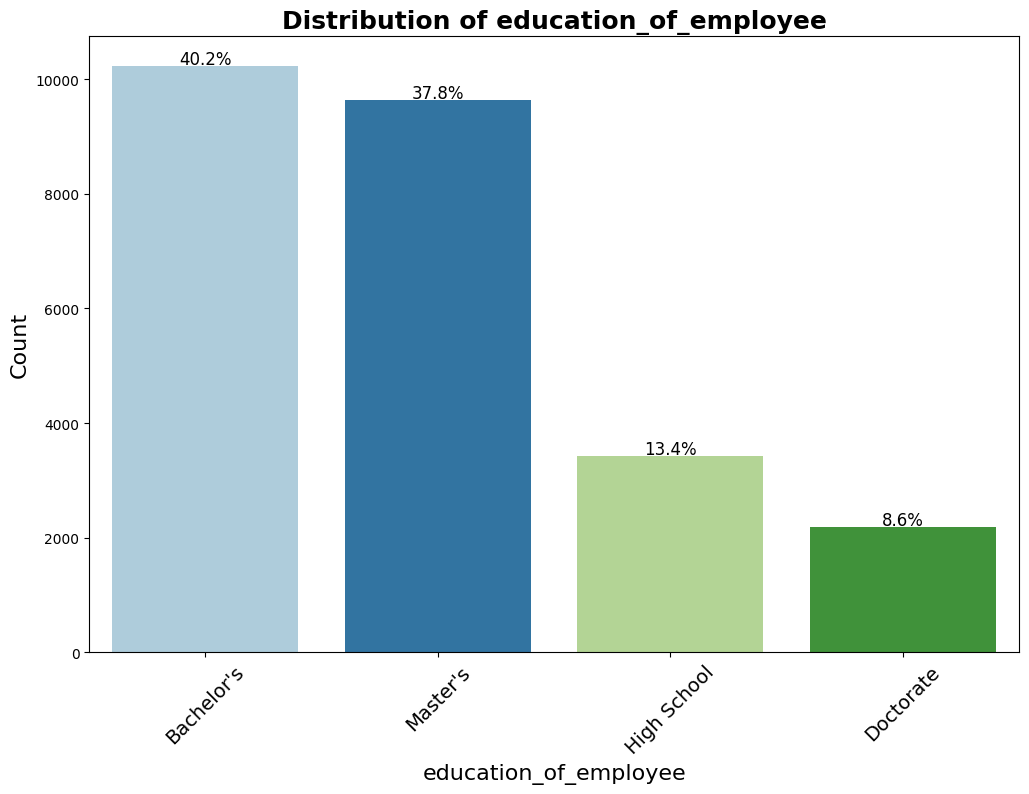

Visualizing categorical feature: has_job_experience


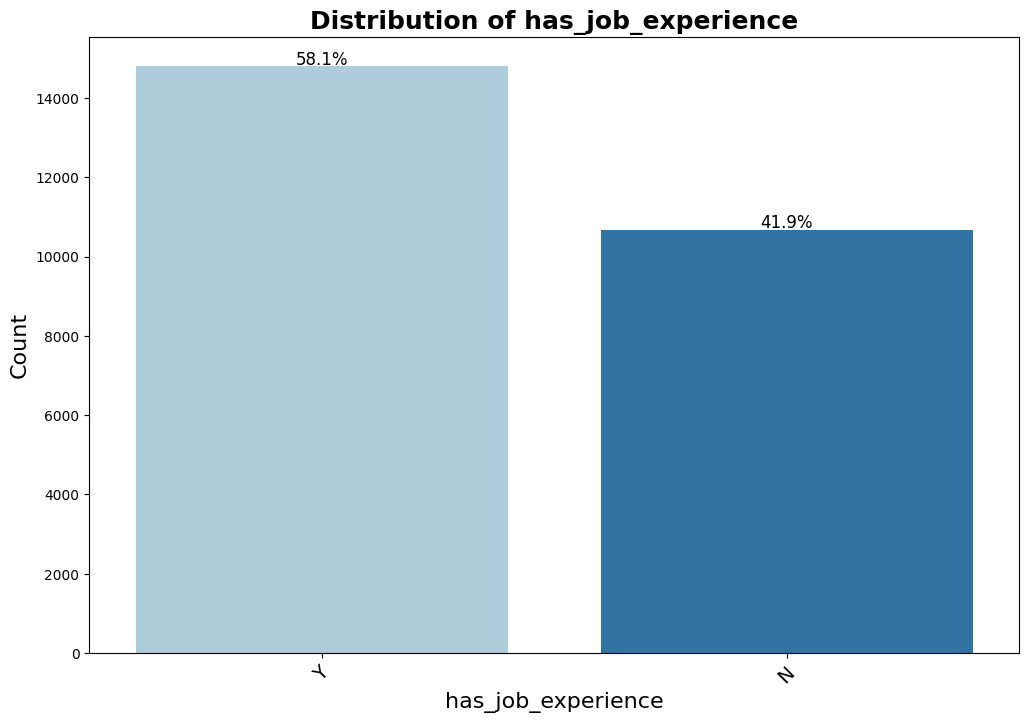

Visualizing categorical feature: requires_job_training


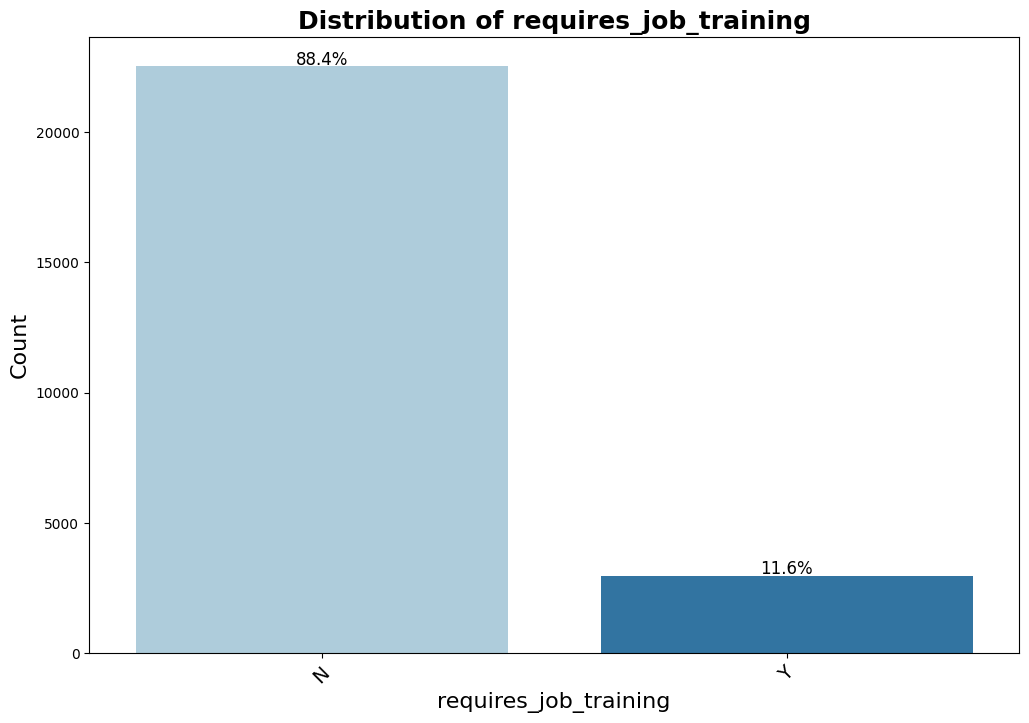

Visualizing categorical feature: region_of_employment


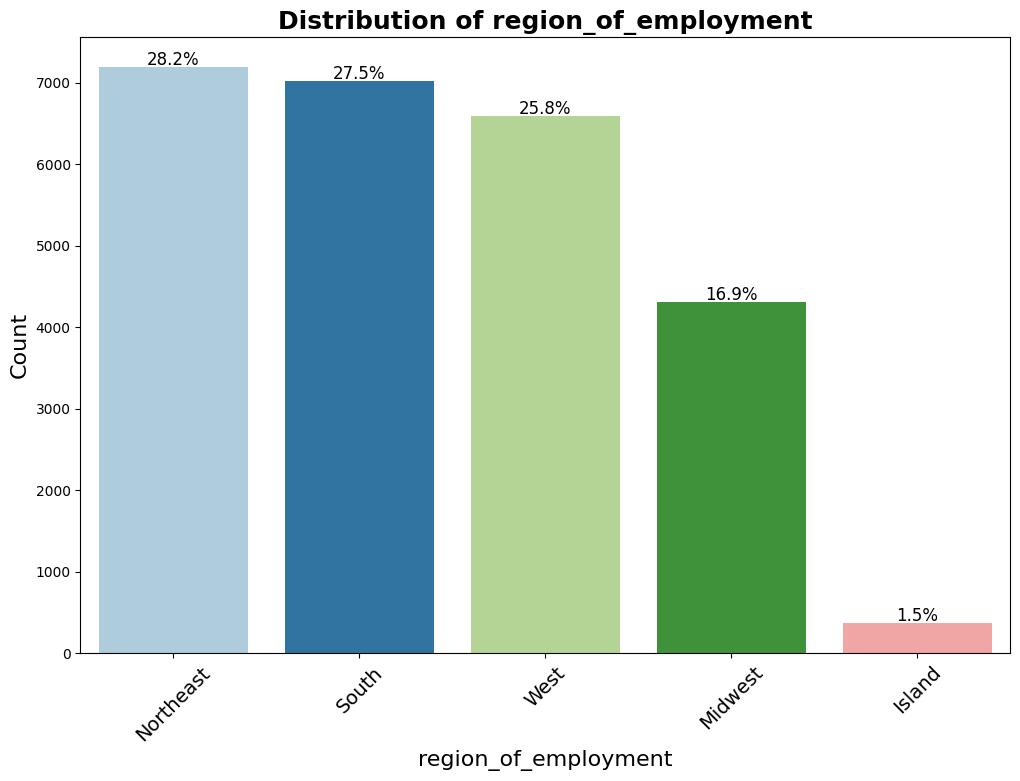

Visualizing categorical feature: unit_of_wage


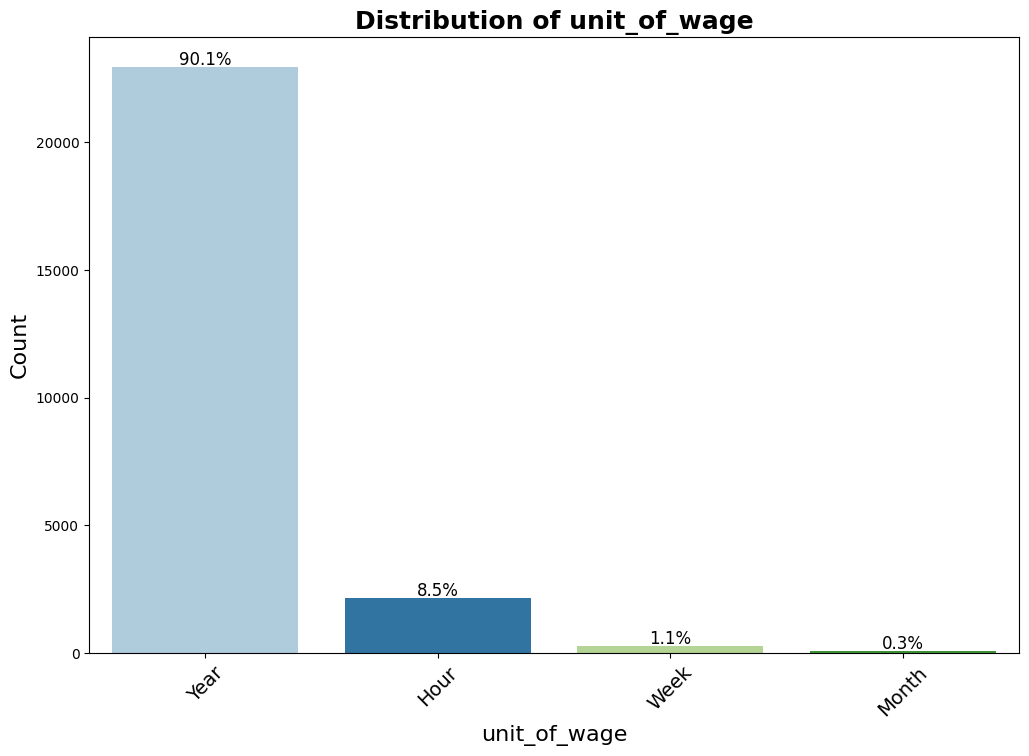

Visualizing categorical feature: full_time_position


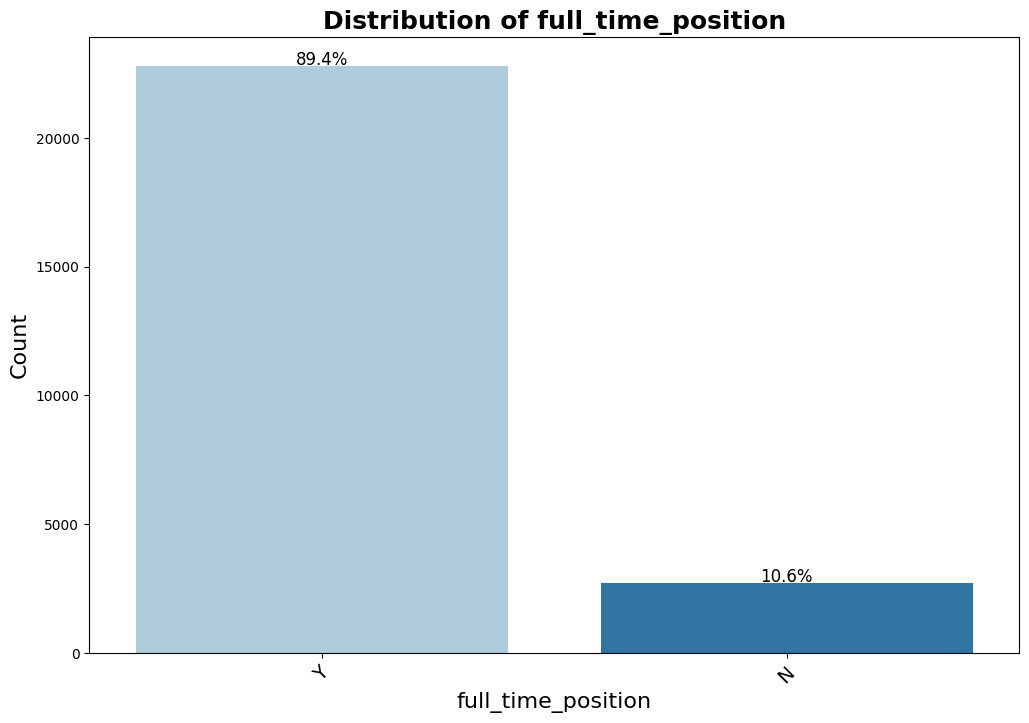

Visualizing categorical feature: case_status


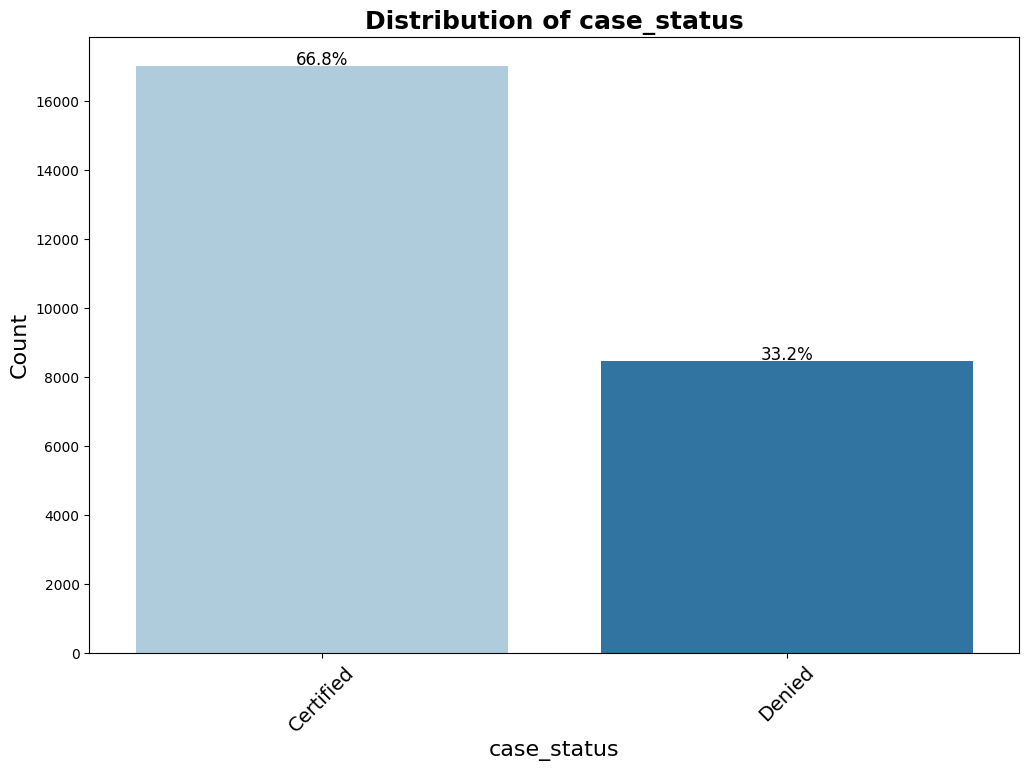

In [138]:
categorical_cols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status",
]

for col in categorical_cols:
    print(f"Visualizing categorical feature: {col}")
    labeled_barplot(df, feature=col, perc=True, n=10)  # Top 10 categories in descending order


#### Observations on education of employee
Bachelor's (40.2%) and Master’s (37.8%) degrees are the most common among applicants.
High School graduates (13.4%) and Doctorate holders (8.6%) form a smaller portion.
Higher education levels may increase the chances of visa approval.

#### Observations on region of employment
Northeast (28.2%), South (27.5%), and West (25.8%) are the most common employment regions.
Midwest (16.9%) has a lower share of employment opportunities.
Island regions (1.5%) have the least employment opportunities.
Employment demand is highest in urban and economically active regions.

#### Observations on job experience
58.1% of applicants have job experience, while 41.9% do not.
Having prior job experience appears to be common among applicants.
A significant portion (over 40%) of applicants lack experience, indicating possible entry-level positions or leniency in experience requirements.

#### Observations on case status
66.8% of applications are certified, while 33.2% are denied.
The approval rate is approximately two-thirds, indicating a relatively high acceptance rate.
The denial rate (33.2%) is still significant, suggesting that certain factors impact visa approval decisions.
Further analysis is needed to identify key factors influencing case outcomes

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [139]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()
    
    axs[0, 0].set_title("Distribution of " + predictor + " for " + str(target_uniq[0]))
    sns.histplot(data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 0], color="teal", stat="density")
    
    axs[0, 1].set_title("Distribution of " + predictor + " for " + str(target_uniq[1]))
    sns.histplot(data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 1], color="orange", stat="density")
    
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette="gist_rainbow")
    
    plt.tight_layout()
    plt.show()


In [140]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="center")
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


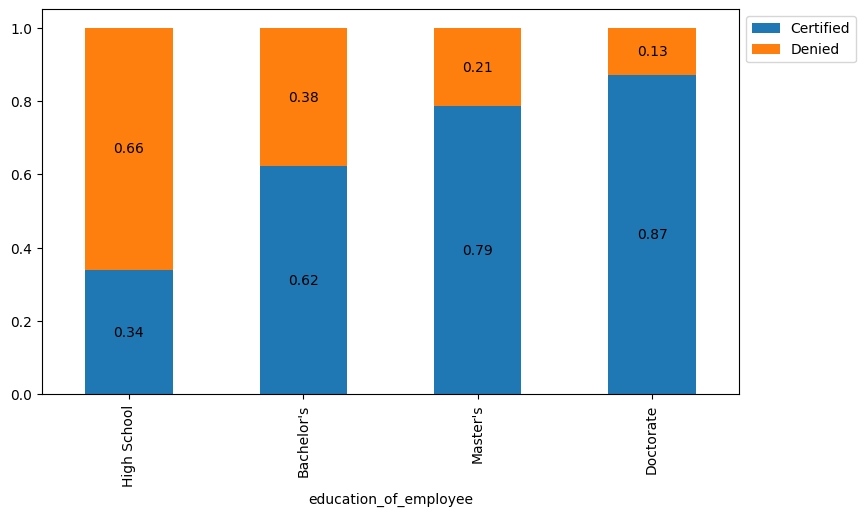

In [141]:
# 1. Impact of Education on Visa Certification
stacked_barplot(df, predictor="education_of_employee", target="case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


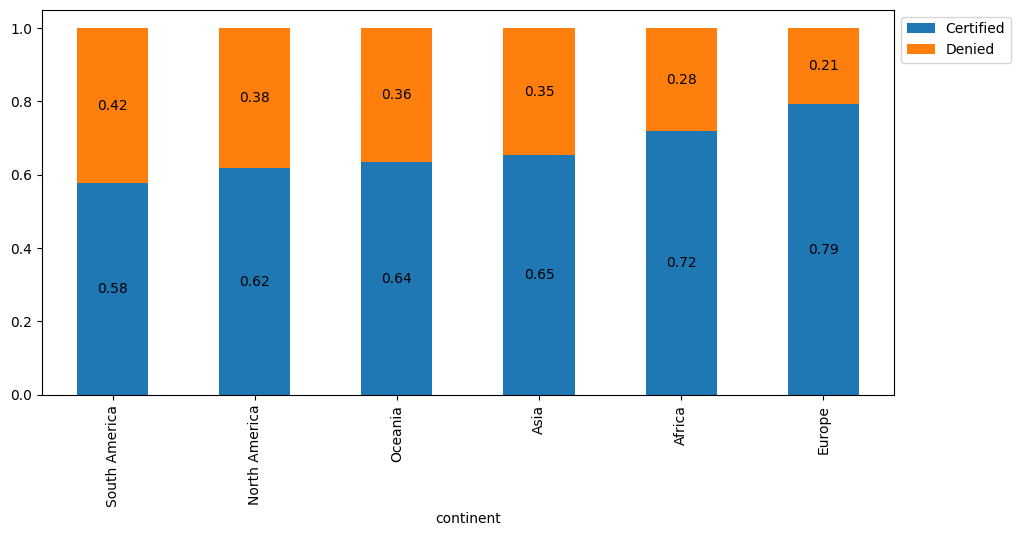

In [142]:
# 2. Impact of Continent on Visa Certification
stacked_barplot(df, predictor="continent", target="case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


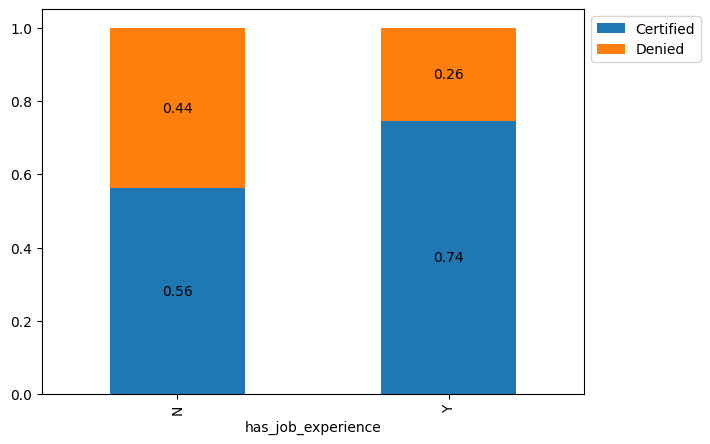

In [143]:
# 3. Impact of Job Experience on Visa Certification
stacked_barplot(df, predictor="has_job_experience", target="case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

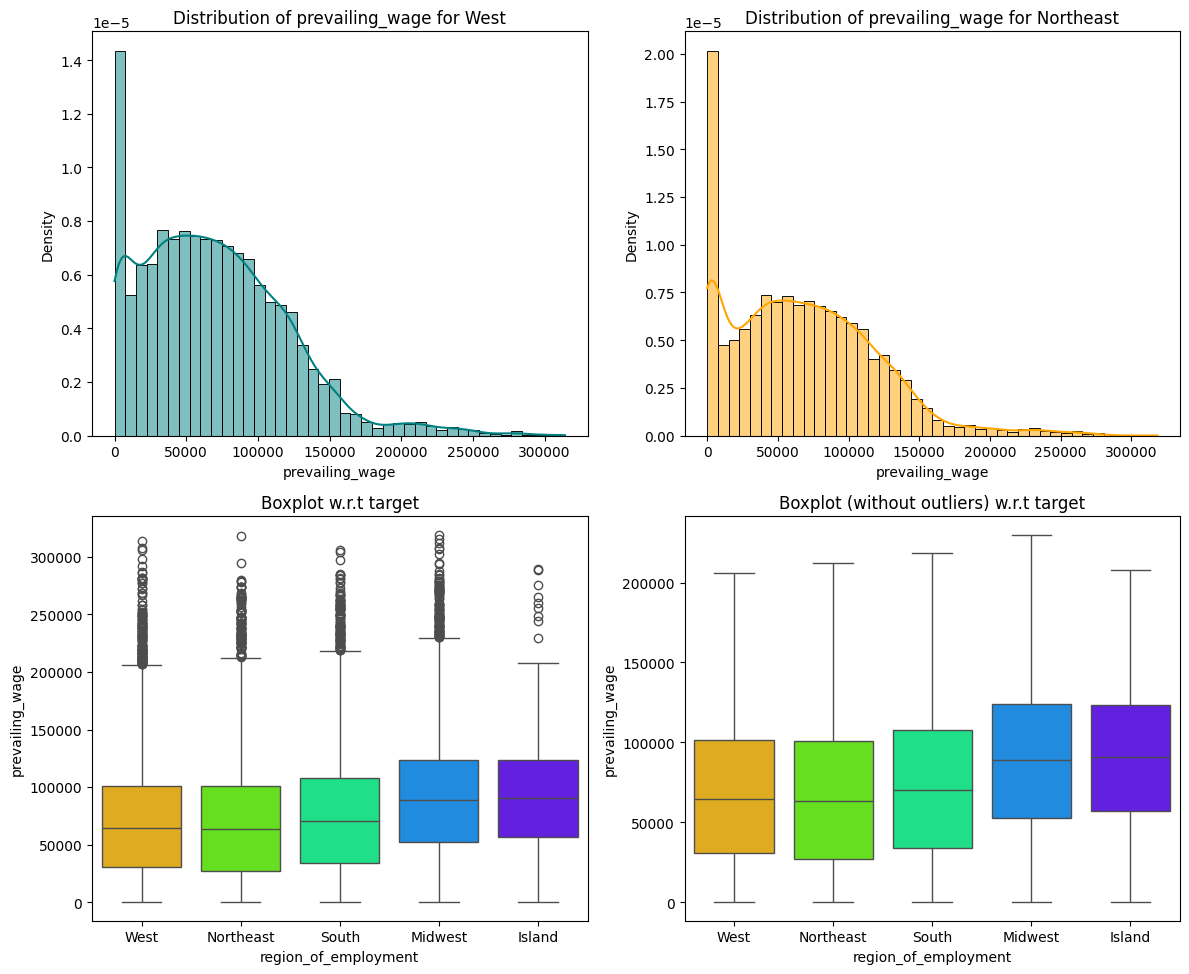

In [144]:
# 4. Checking if Prevailing Wage is Similar Across US Regions
distribution_plot_wrt_target(df, predictor="prevailing_wage", target="region_of_employment")

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

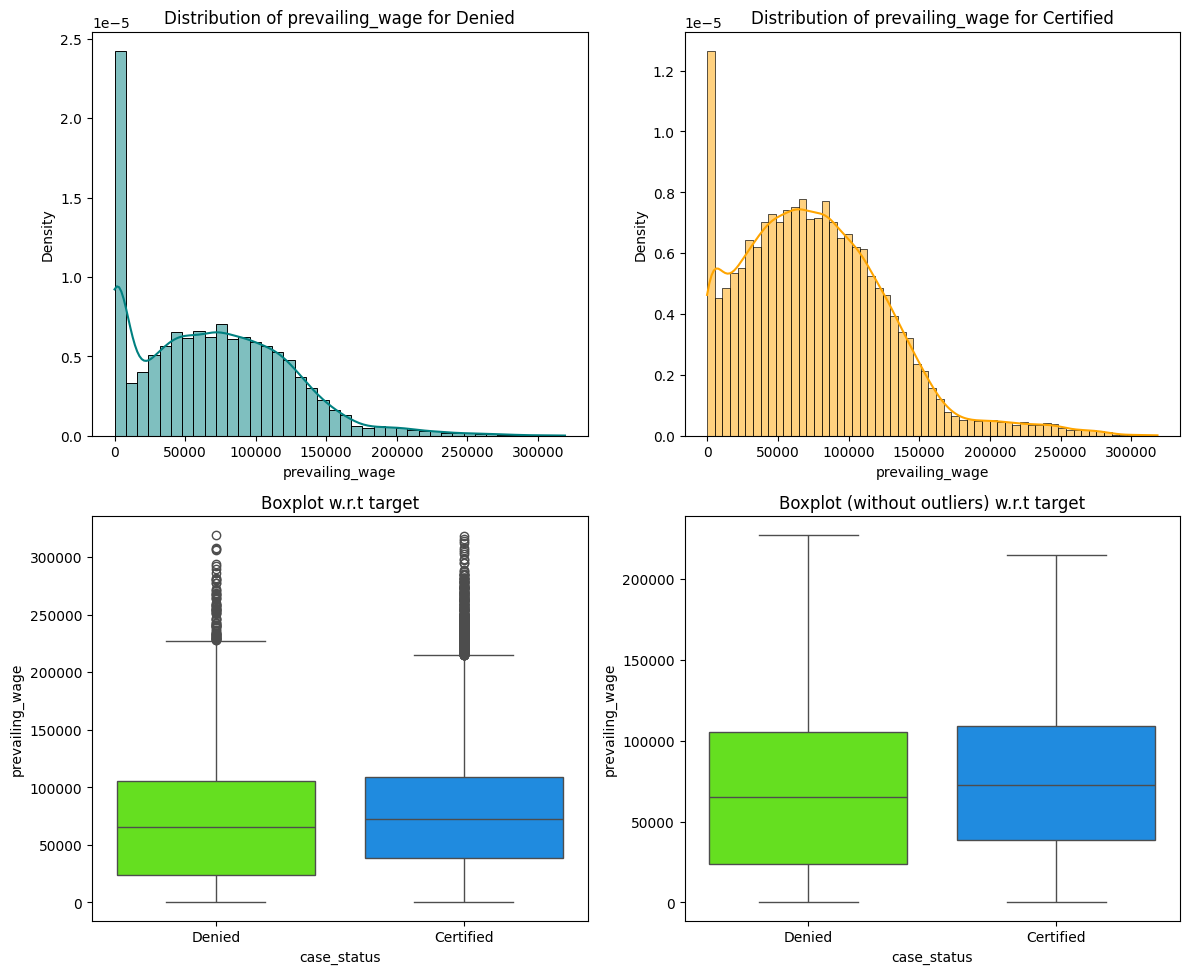

In [145]:
# 5. Impact of Prevailing Wage on Visa Certification
distribution_plot_wrt_target(df, predictor="prevailing_wage", target="case_status")


#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

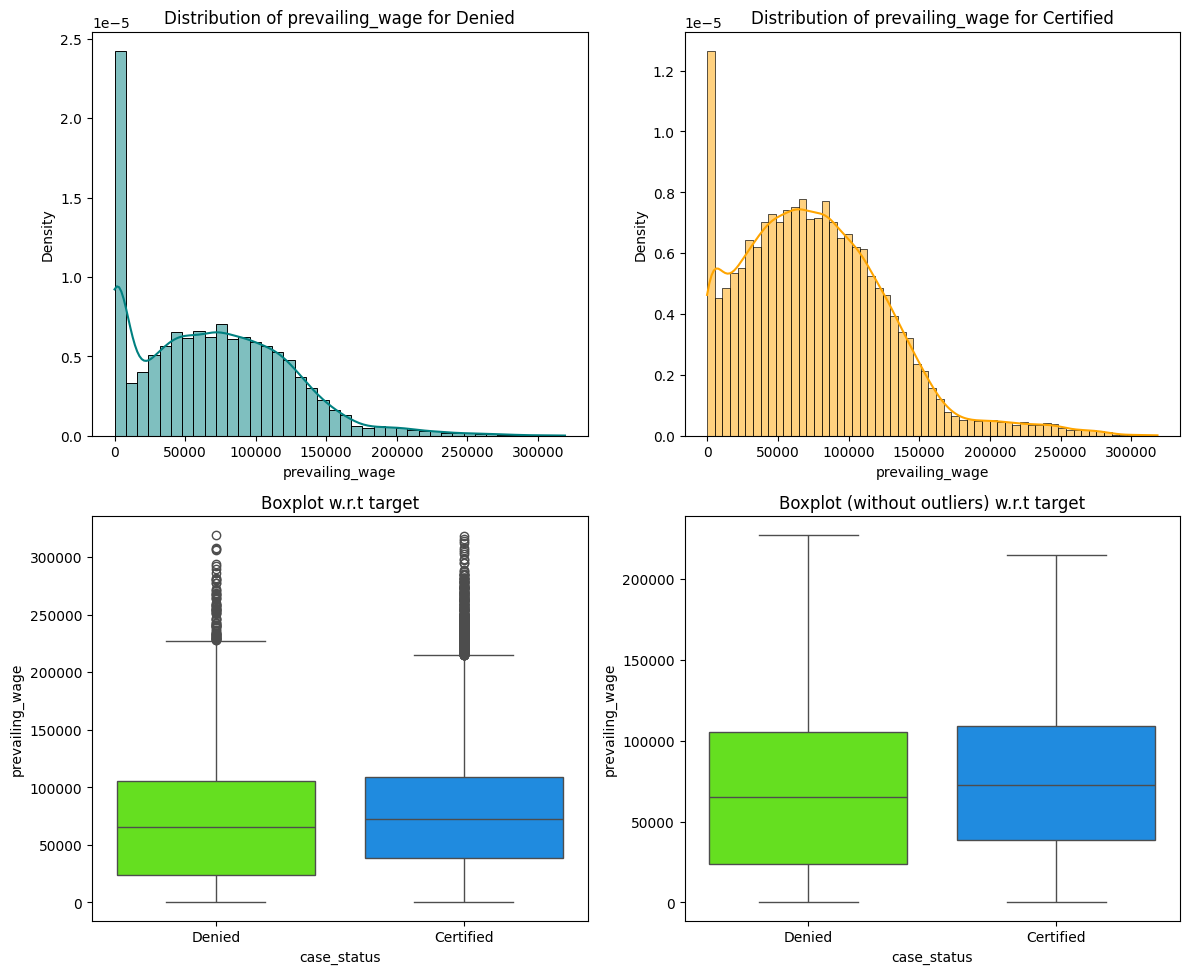

In [146]:
# 6. Impact of Prevailing Wage on Visa Certification
distribution_plot_wrt_target(df, predictor="prevailing_wage", target="case_status")


## Data Pre-processing

### Outlier Check

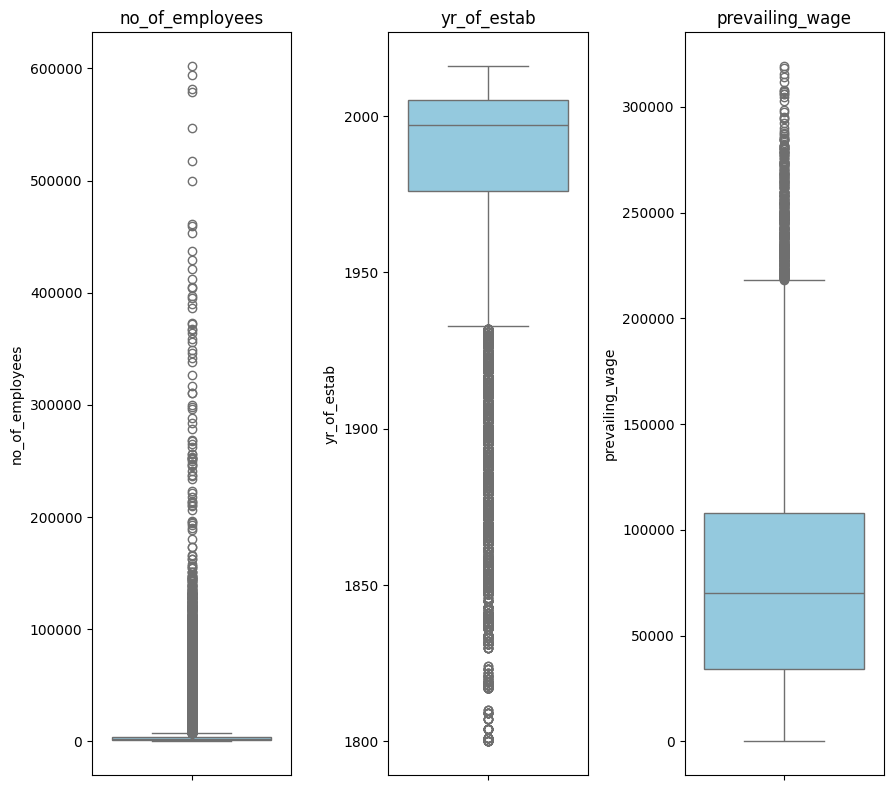

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Define number of rows and columns for subplots
num_cols = 4  # Number of columns per row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, variable in enumerate(numeric_columns):
    sns.boxplot(y=data[variable], ax=axes[i], color="skyblue", whis=1.5)
    axes[i].set_title(variable)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [148]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Data Preparation for modeling

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop the unique identifier
df.drop(columns=["case_id"], inplace=True)

# Define the target variable
y = df["case_status"]
X = df.drop(columns=["case_status"])  # Features

# Identify categorical and numerical columns
categorical_cols = ["continent", "education_of_employee", "unit_of_wage", "region_of_employment"]
binary_cols = ["has_job_experience", "requires_job_training", "full_time_position"]
numerical_cols = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for future use

# Convert binary columns ('Y'/'N') to 1/0
for col in binary_cols:
    X[col] = X[col].map({"Y": 1, "N": 0})

# Handle missing values (Fill categorical with mode, numerical with median)
for col in categorical_cols + binary_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Feature scaling for numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# First, split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training data into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Print dataset shapes
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)

# Print class distributions
print("\nPercentage of classes in Training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nPercentage of classes in Validation set:")
print(y_val.value_counts(normalize=True) * 100)

print("\nPercentage of classes in Test set:")
print(y_test.value_counts(normalize=True) * 100)


Shape of Training set :  (15288, 10)
Shape of Validation set :  (5096, 10)
Shape of Test set :  (5096, 10)

Percentage of classes in Training set:
Certified    66.784406
Denied       33.215594
Name: case_status, dtype: float64

Percentage of classes in Validation set:
Certified    66.797488
Denied       33.202512
Name: case_status, dtype: float64

Percentage of classes in Test set:
Certified    66.797488
Denied       33.202512
Name: case_status, dtype: float64


## Model Building

### Model Evaluation Criterion

In [150]:
# Function to compute classification model performance metrics
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance.

    Parameters:
    model: classifier (trained model)
    predictors: independent variables (X)
    target: dependent variable (y_true)

    Returns:
    DataFrame containing Accuracy, Recall, Precision, and F1-score
    """
    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Compute Accuracy
    recall = recall_score(target, pred)  # Compute Recall
    precision = precision_score(target, pred)  # Compute Precision
    f1 = f1_score(target, pred)  # Compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": [acc], "Recall": [recall], "Precision": [precision], "F1-score": [f1]}
    )

    return df_perf

In [151]:
# Function to plot the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion matrix with percentages.

    Parameters:
    model: classifier (trained model)
    predictors: independent variables (X)
    target: dependent variable (y_true)
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    labels = np.asarray(
        [
            [f"{item:0.0f}\n{item / cm.sum():.2%}"]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [152]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score

# Defining the scorer for cross-validation and hyperparameter tuning
scorer = make_scorer(f1_score)  # You can replace f1_score with accuracy_score, recall_score, or precision_score


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [ ]:
if "case_id" in data.columns:
    data.drop(columns=["case_id"], inplace=True)


### Model building with original data

In [155]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# List to store models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))  # Fixed
models.append(("GBM", GradientBoostingClassifier(random_state=1)))  # Fixed
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))  # Fixed
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))  # Fixed

# List to store cross-validation results and model names
results1 = []
names = []

# Number of splits for Stratified K-Fold
n_splits = 5  #  You can adjust this

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Performance on Training Dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)  #  Fixed
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    
    results1.append(cv_result)
    names.append(name)
    print("{}: {:.4f}".format(name, cv_result.mean()))  #  Formatted output

# Validation performance
print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train)  #  Fixed
    scores = f1_score(y_val, model.predict(X_val))  #  Used F1-score as the metric (you can change this)
    print("{}: {:.4f}".format(name, scores))  #  Formatted output

# Plot boxplots for cross-validation scores of all models
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")

ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()



Cross-Validation Performance on Training Dataset:

Bagging: nan
Random forest: nan
GBM: nan
Adaboost: nan


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Oalolu.adeniyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Oalolu.adeniyi\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Oalolu.adeniyi\AppData\Local\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Certified' 'Denied']


### Model Building with oversampled data

### Model Building with undersampled data

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

### Tuning Random forest using undersampled data

### Tuning with Gradient boosting with oversampled data

### Tuning XGBoost using oversampled data

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___